# Library

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

In [2]:
# 소수점 옵션
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

# 수정사항
- 2023.03.21
    - item 2 : EG
        - 1. 개별 차량에 대한 지역코드를 부여하여, 지역마다 얼마나 차량들이 존재하는지 구분이 필요한 것 같음

    이 외에도 내일 오전에 동양에서 가시화와 관련된 회의에서 추가적으로 필요하다고 판단되는 사항에 대해 추가적으로 분석이 필요할 것 같음

- 2023.03.22
    - result파일에 'EG' 컬럼 추가

- 2023.03.24
    - result파일에 '배인번호_수정', '등급_수정', 'DPF유무_수정' 컬럼 추가

# fold path

In [3]:
drive = 'D'

In [4]:
raw_fold = f'{drive}:/data/big2/BD1/raw'
ods_fold = f'{drive}:/data/big2/ODS'
sample_fold = f'{drive}:/data/big2/BD1/sample'
analysis_fold = f'{drive}:/data/big2/BD1/an'
df_fold = f'{drive}:/data/big2/BD1/df'

# Load
- 등록&제원 -> result 4등급(연료 : 경유, 휘발유, LPG)

## result 최종(전체)(최근3년 정기&정밀 검사 포함)

In [5]:
# about 23.5s
name = '4등급_차량_리스트_양식_result_최종(전체)(정기&정밀)(2023.05.18_AM.08.05.03)'
file_name = f'{name}.csv'
result = pd.read_csv(os.path.join(raw_fold, file_name), low_memory=False)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502235 entries, 0 to 1502234
Data columns (total 60 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   차대번호        1502235 non-null  object 
 1   차량번호        1502235 non-null  object 
 2   제원관리번호      1502235 non-null  object 
 3   차종          1502235 non-null  object 
 4   용도          1502235 non-null  object 
 5   최초등록일       1502235 non-null  int64  
 6   연식          1502235 non-null  int64  
 7   제작일자        1335178 non-null  float64
 8   검사유효일       1502223 non-null  float64
 9   배출가스인증번호    1384783 non-null  object 
 10  등급          1502235 non-null  int64  
 11  차명          1502235 non-null  object 
 12  차종분류        1502235 non-null  object 
 13  차종유형        1502235 non-null  object 
 14  자동차형식       1501958 non-null  object 
 15  제작사명        1492590 non-null  object 
 16  연료          1502235 non-null  object 
 17  엔진형식        1500400 non-null  object 
 18  총중량         1502234 no

In [6]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '제원관리번호'].value_counts()

제원관리번호
02420011500011209    584
02420011500031210    208
02420011500001209    184
Name: count, dtype: int64

In [7]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', ['제원관리번호', '등급_수정']].head()

,제원관리번호,등급_수정
1002799,02420011500001209,4.00
1002800,02420011500011209,4.00
1002801,02420011500011209,4.00
1002802,02420011500011209,4.00
1002803,02420011500001209,4.00


# 전처리

## 컬럼명 수정

In [8]:
result.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

## 9MY-AD-14-04 4등급 수정 확인

In [9]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'].shape

(976,)

In [10]:
result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'].unique()

array([4.])

In [11]:
# result.loc[result['배출가스인증번호'] == '9MY-AD-14-04', '등급_수정'] = 4

## 유니목1200 5등급으로 수정 확인

In [12]:
result.loc[result['차대번호'] =='WDB1260251A480232', ['차명', '등급_수정']]

,차명,등급_수정
1150788,유니목1200,5.00


In [13]:
# result.loc[result['차대번호'] =='WDB1260251A480232', '등급_수정'] = 5

## 휘발유, LPG 차량 등급_수정 값 확인
- 4등급

In [14]:
result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'].value_counts(dropna=False)

등급_수정
4.00    348419
Name: count, dtype: int64

In [15]:
# result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'] = 4

In [16]:
# result.loc[(result['연료'] == '휘발유') | (result['연료'] == 'LPG(액화석유가스)'), '등급_수정'].value_counts(dropna=False)

## 알코올, CNG, 기타연료 등급_수정 값 수정
- 4등급

In [17]:
result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'].value_counts(dropna=False)

등급_수정
4.00    3
Name: count, dtype: int64

In [18]:
# result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'] = 4

In [19]:
# result.loc[(result['연료'] == '알코올') | (result['연료'] == 'CNG(압축천연가스)') | (result['연료'] == '기타연료'), '등급_수정'].value_counts(dropna=False)

## 등급 수정
- 5등급으로 수정
    - 배인번호_수정 : 4MY-DB-04, 24개
    - 배인번호_수정 : 4MY-DB-03, 9개

In [20]:
result['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [21]:
result.loc[result['배인번호_수정'] == '4MY-DB-04'].shape

(24, 60)

In [22]:
result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

array([5.])

In [23]:
# result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'] = 5

In [24]:
# result.loc[result['배인번호_수정'] == '4MY-DB-04', '등급_수정'].unique()

In [25]:
result.loc[result['배인번호_수정'] == '4MY-DB-03'].shape

(9, 60)

In [26]:
result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

array([5.])

In [27]:
# result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'] = 5

In [28]:
# result.loc[result['배인번호_수정'] == '4MY-DB-03', '등급_수정'].unique()

In [29]:
result['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

## 6MY-HD-14-64 DPF 장착 확인
- 유

In [30]:
result.loc[result['배인번호_수정'] == '6MY-HD-14-64', 'DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
유    4088
Name: count, dtype: int64

## 4등급 차량만

In [31]:
result.loc[result['연료'] == '경유', '등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1149256
3.00       4397
5.00        160
Name: count, dtype: int64

In [32]:
result['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [33]:
result['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [34]:
result1 = result.loc[result['등급_수정'] == 4]
result1.shape

(1497678, 60)

In [35]:
g3_g5 = result.loc[result['등급_수정'] != 4]
g3_g5.shape

(4557, 60)

## 중복 차대번호 확인
- 최종등록일자, 배출가스검사유효일자 최신 데이터 사용

In [36]:
len(result1['차대번호'].unique())

1497657

## 연료 확인

In [37]:
result1['연료'].value_counts(dropna=False)

연료
경유             1149256
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

## 연료 컬럼 추가

In [38]:
# 1149256
rw1 = result1.loc[result1['연료'] == '경유'].reset_index(drop=True)
rw1.shape

(1149256, 60)

In [39]:
# 348419
rw2 = result1.loc[(result1['연료'] == '휘발유') | (result1['연료'] == 'LPG(액화석유가스)')].reset_index(drop=True)
rw2.shape

(348419, 60)

In [40]:
# 3
rw_rest = result1.loc[(result1['연료'] == '알코올') | (result1['연료'] == 'CNG(압축천연가스)') | (result1['연료'] == '기타연료')].reset_index(drop=True)
rw_rest.shape

(3, 60)

In [41]:
result1.shape[0]

1497678

In [42]:
rw1.shape[0] + rw2.shape[0] + rw_rest.shape[0]

1497678

In [43]:
rw1['fuel'] = '경유'
rw2['fuel'] = '휘발유_가스'

In [44]:
result1['연료'].value_counts(dropna=False)

연료
경유             1149256
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [45]:
rw1['fuel'].value_counts()

fuel
경유    1149256
Name: count, dtype: int64

In [46]:
rw2['fuel'].value_counts()

fuel
휘발유_가스    348419
Name: count, dtype: int64

## 경유, 휘발유_가스, 나머지 병합

In [47]:
rw1.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'],
      dtype='object')

In [48]:
rw2.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'],
      dtype='object')

In [49]:
rw_rest.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀'],
      dtype='object')

In [50]:
df = pd.concat([rw1, rw2, rw_rest], ignore_index=True)
df.shape

(1497678, 61)

In [51]:
df['fuel'].value_counts(dropna=False)

fuel
경유        1149256
휘발유_가스     348419
NaN             3
Name: count, dtype: int64

In [52]:
df['DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
무       879332
NaN     348422
유       257763
확인불가     12161
Name: count, dtype: int64

In [53]:
# df['DPF유무_수정'] = df['DPF유무_수정'].fillna('무')
# df.loc[df['DPF유무_수정'] == '확인불가', 'DPF유무_수정'] = '무'

In [54]:
df['DPF유무_수정'].value_counts(dropna=False)

DPF유무_수정
무       879332
NaN     348422
유       257763
확인불가     12161
Name: count, dtype: int64

# 분석

## EG 분류

In [55]:
grade_list = []
for f, y, cy, e in tqdm(df[['fuel', '제작일자', '연식', 'DPF유무_수정']].values):
    if (f == '휘발유_가스') and ( (19980101 <= y <= 20001231) or (1998 <= cy <= 2000) ):
        grade_list.append('A')
    elif (f == '휘발유_가스') and ( (y <= 19971231) or (cy <= 1997) ):
        grade_list.append('B')
    elif (f == '경유') and ( (y >= 20080101) or (cy >= 2008) ) and (e == '유'):
        grade_list.append('A')
    elif (f == '경유') and ( (y <= 20071231) or (cy <= 2007) )and (e == '유'):
        grade_list.append('B')
    elif (f == '경유') and ( (y >= 20080101) or (cy >= 2008) ) and (e == '무'):
        grade_list.append('C')
    elif (f == '경유') and ( (y <= 20071231) or (cy <= 2007) ) and (e == '무'):
        grade_list.append('D')
    else:
        grade_list.append('X')
len(grade_list)

100%|██████████| 1497678/1497678 [00:02<00:00, 537301.80it/s]


1497678

In [56]:
grade_list[:5]

['D', 'D', 'D', 'D', 'D']

In [57]:
num = 85420
grade_list[num:num+10]

['C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C']

In [58]:
grade_list[-5:]

['B', 'B', 'X', 'X', 'X']

In [59]:
df['Grade'] = grade_list

In [60]:
num_by_fuel = df.groupby(['fuel'])['차대번호'].count().reset_index().sort_values('차대번호', ascending=False)
num_by_fuel = num_by_fuel.rename(columns={'차대번호':'대수'})
num_by_fuel

,fuel,대수
0,경유,1149256
1,휘발유_가스,348419


In [61]:
num_by_grade = df.groupby(['fuel', 'Grade'])['차대번호'].count().unstack()
# num_by_grade = num_by_grade.rename('대수')
num_by_grade

Grade,A,B,C,D,X
fuel,,,,,
경유,168101.00,89662.00,840412.00,38920.00,12161.00
휘발유_가스,40729.00,291937.00,NaN,NaN,15753.00


In [62]:
num_by_grade_by_local = df.groupby(['시도명', 'Grade'])['차대번호'].count().unstack()
# num_by_grade_by_local = num_by_grade_by_local.rename('대수')
num_by_grade_by_local

Grade,A,B,C,D,X
시도명,,,,,
강원도,7578,10862,34962,1675,845
경기도,52609,100680,189682,9816,6721
경상남도,16135,23533,71293,3022,1967
경상북도,14205,23734,73252,2901,1913
광주광역시,5754,10147,21859,1006,628
대구광역시,10133,18780,36182,1926,1492
대전광역시,5795,11794,21701,1094,891
부산광역시,11464,19690,41170,1775,1468
서울특별시,25604,63027,77484,4289,4924


In [63]:
num_by_grade_by_local.columns

Index(['A', 'B', 'C', 'D', 'X'], dtype='object', name='Grade')

In [64]:
num_by_grade_by_local.index

Index(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도', '충청남도',
       '충청북도'],
      dtype='object', name='시도명')

In [65]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

## [출력] 4등급

In [66]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

In [61]:
df1 = df[[
    '차대번호', 
    '법정동코드', 
    '연식', 
    '차종유형', 
    '연료', 
    'Grade'
    ]]
df1.columns

Index(['차대번호', '법정동코드', '연식', '차종유형', '연료', 'Grade'], dtype='object')

In [65]:
df1.shape

(1497678, 17)

In [62]:
ch_col_dict = {
                '차대번호':'VIN', 
                '법정동코드':'STDG_CD', 
                '연식':'YRIDNW', 
                '차종유형':'VHCTY_TY', 
                '연료':'FUEL_CD', 
                'Grade':'GRD4_MLSFC', 
                }

In [63]:
df2 = df1.rename(columns=ch_col_dict)
df2.columns

Index(['VIN', 'STDG_CD', 'YRIDNW', 'VHCTY_TY', 'FUEL_CD', 'GRD4_MLSFC'], dtype='object')

In [65]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.05.26_PM.03.14.10'

In [67]:
# about 8.8s
df2.to_csv(os.path.join(df_fold, f'BD1-2_STD_BD_GRD4_MLSFC_RSLT({today_date}).csv'), index=False)

In [72]:
# # about 20.8s
# df1.to_csv(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date}).csv'), index=False, encoding='cp949')

In [104]:
# # about 21m 8.3s
# n = 700000
# df1.iloc[:n].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date})01.xlsx'), index=False)
# df1.iloc[n:].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(경유,휘발유,LPG)_Grade_추가({today_date})02.xlsx'), index=False)

## [출력] 4등급 + 3등급(등급_수정) + 5등급(등급_수정)

In [67]:
total = pd.concat([df, g3_g5], ignore_index=True)
total.shape

(1502235, 62)

In [68]:
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', '검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel', 'Grade'],
      dtype='object')

In [69]:
total = total.drop(['검사방법', '검사종류', '검사판정', '산소값', '이산화탄소값', '무부하매연판정1',
       '무부하매연판정2', '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연허용치1',
       '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5', '무부하매연허용치6',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5',
       '무부하매연측정치6', '정기정밀', 'fuel'], axis=1)
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade'],
      dtype='object')

In [76]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.05.18_AM.09.01.21'

In [77]:
# about 21.8s
total.to_csv(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date}).csv'), index=False, encoding='cp949')

In [79]:
# about 14m 7.3s
n = 700000
total.iloc[:n].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date})01.xlsx'), index=False)
total.iloc[n:].to_excel(os.path.join(raw_fold, f'4등급_차량_리스트_양식_result(전체)_Grade_추가({today_date})02.xlsx'), index=False)

## 시도, 연도별 차량 대수

In [70]:
total['최초등록일'].describe()

count    1502235.00
mean    20056945.62
std        68680.98
min         1993.00
25%     20060824.00
50%     20081217.00
75%     20100512.00
max     20221125.00
Name: 최초등록일, dtype: float64

In [71]:
total.shape

(1502235, 37)

In [72]:
total.loc[(total['최초등록일'] >= 20190101) & (total['최초등록일'] < 20230101)].shape

(144, 37)

In [73]:
total2 = total.copy()

In [74]:
total2['최초등록일'] = total2['최초등록일'].astype('str')

In [75]:
total2.loc[total2['최초등록일'].str.len() != 8]

,차대번호,차량번호,제원관리번호,차종,용도,최초등록일,연식,제작일자,검사유효일,배출가스인증번호,...,일치유무,인증번호 수정 유무,배인번호_수정,등급_수정,DPF유무_수정,배출가스,등급2,DPF,비고,Grade
1172636,KMHJF31JPPU555457,경기34머9199,10022700140000,승용,자가용,1993,1993,1993.00,20031014.00,KMY-HD-04,...,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,B
1260821,KLAER1931TB044115,강원27누7569,10002200860001,승용,자가용,9960617,1996,9960617.00,20020616.00,NaN,...,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,B


### 최초등록일를 연식으로 수정

In [76]:
total2.loc[total2['최초등록일'] == '1993', '최초등록일'] = '19930101'
total2.loc[total2['최초등록일'] == '9960617', '최초등록일'] = '19960617'

In [77]:
total2.loc[total2['최초등록일'].str.len() != 8].shape

(0, 37)

In [78]:
total2['최초등록일_년'] = total2['최초등록일'].str[:4]
total2['최초등록일_월'] = total2['최초등록일'].str[4:6]
total2['최초등록일_일'] = total2['최초등록일'].str[6:8]

In [79]:
total2[['최초등록일', '최초등록일_년', '최초등록일_월', '최초등록일_일']].head()

,최초등록일,최초등록일_년,최초등록일_월,최초등록일_일
0,20060208,2006,02,08
1,20060228,2006,02,28
2,20060105,2006,01,05
3,20060105,2006,01,05
4,20060630,2006,06,30


In [80]:
total2['최초등록일_년월'] = total2['최초등록일_년'] + '.' + total2['최초등록일_월']
total2['최초등록일_년월'].head()

0    2006.02
1    2006.02
2    2006.01
3    2006.01
4    2006.06
Name: 최초등록일_년월, dtype: object

In [81]:
total2.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '최초등록일_년', '최초등록일_월', '최초등록일_일', '최초등록일_년월'],
      dtype='object')

### 시군구명 앞쪽 지역명만 남기기

In [82]:
total2.loc[50:55, ['시도명', '시군구명']]

,시도명,시군구명
50,경기도,용인시 기흥구
51,경기도,안양시 동안구
52,전라북도,전주시 덕진구
53,경기도,하남시
54,대구광역시,수성구
55,울산광역시,북구


In [83]:
total2['시군구명_수정'] = total2['시군구명'].str.split(' ').str[0]

In [84]:
total2.loc[50:55, ['시도명', '시군구명', '시군구명_수정']]

,시도명,시군구명,시군구명_수정
50,경기도,용인시 기흥구,용인시
51,경기도,안양시 동안구,안양시
52,전라북도,전주시 덕진구,전주시
53,경기도,하남시,하남시
54,대구광역시,수성구,수성구
55,울산광역시,북구,북구


In [96]:
num_car_by_local = total2.groupby(['시도명', '시군구명_수정', '최초등록일_년', '최초등록일_월'])['차대번호'].count().reset_index()
num_car_by_local = num_car_by_local.rename(columns={'차대번호':'차량대수'})
num_car_by_local

,시도명,시군구명_수정,최초등록일_년,최초등록일_월,차량대수
0,강원도,강릉시,1987,11,2
1,강원도,강릉시,1987,12,1
2,강원도,강릉시,1988,01,3
3,강원도,강릉시,1988,02,2
4,강원도,강릉시,1988,03,4
...,...,...,...,...,...
58833,충청북도,충주시,2017,10,1
58834,충청북도,충주시,2018,01,1
58835,충청북도,충주시,2018,07,1
58836,충청북도,충주시,2018,12,1


#### 출력 

In [129]:
# about 
num_car_by_local.to_excel(os.path.join(analysis_fold, '통계_result_시군구_월별_차량수.xlsx'), index=False)

### 시도 시군구별 차량 현황

In [118]:
total2.shape

(1502235, 42)

In [120]:
total2.loc[total2['최초등록일'] < '20220601'].shape

(1502232, 42)

In [121]:
num_car_by_local2 = total2.loc[total2['최초등록일'] < '20220601'].groupby(['시도명', '시군구명_수정'])['차대번호'].count().reset_index()
num_car_by_local2 = num_car_by_local2.rename(columns={'차대번호':'차량대수'})
num_car_by_local2

,시도명,시군구명_수정,차량대수
0,강원도,강릉시,7085
1,강원도,고성군,1399
2,강원도,동해시,3247
3,강원도,삼척시,2482
4,강원도,속초시,2478
...,...,...,...
227,충청북도,증평군,1510
228,충청북도,진천군,3726
229,충청북도,청원군,4
230,충청북도,청주시,25953


In [122]:
num_car_by_local2.to_excel(os.path.join(analysis_fold, '통계_4등급차_시도_시군구별_차량현황_2022년.xlsx'), index=False)

### 시도, 시군구, 월, 월 기준 차량대수 및 말소 대수

In [87]:
# about 19.4s
name = '말소정보_전처리완료(2023.05.24)'
file_name = f'{name}.csv'
erase = pd.read_csv(os.path.join(ods_fold, file_name), low_memory=False)
erase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642251 entries, 0 to 3642250
Data columns (total 24 columns):
 #   Column       Dtype  
---  ------       -----  
 0   차량관리번호       object 
 1   본거지법정동코드     int64  
 2   차종_등록정보      object 
 3   차대번호         object 
 4   차량연식         int64  
 5   제원관리번호       object 
 6   배출가스인증번호     object 
 7   배출가스등급       object 
 8   차량말소YN_등록정보  object 
 9   차명           object 
 10  연료           object 
 11  등급           object 
 12  차량말소YN_변경이력  object 
 13  변경일자         float64
 14  변경구분코드       float64
 15  법정동코드        int64  
 16  시도           object 
 17  시구군          object 
 18  읍면동          object 
 19  리            object 
 20  지역3          float64
 21  폐지여부         object 
 22  대기관리권역       object 
 23  대기관리권역YN     object 
dtypes: float64(3), int64(3), object(18)
memory usage: 666.9+ MB


In [88]:
erase1 = erase[['차대번호', '시도', '시구군', '등급', '변경일자']]
erase1.shape

(3642251, 5)

In [90]:
erase1['등급'].value_counts(dropna=False)

등급
3.0    1198427
5.0    1189962
2.0     783830
4.0     366937
1.0      88800
X        14263
NaN         32
Name: count, dtype: int64

In [91]:
erase2 = erase1.loc[erase1['등급'] == '4.0'].reset_index(drop=True)
erase2.shape

(366937, 5)

In [92]:
erase2['변경일자'] = erase2['변경일자'].astype('str')

In [93]:
erase2['변경일자'].head()

0    20220628.0
1    20220628.0
2    20220628.0
3    20220628.0
4    20220628.0
Name: 변경일자, dtype: object

In [94]:
erase2['변경일자_년'] = erase2['변경일자'].str[:4]
erase2['변경일자_월'] = erase2['변경일자'].str[4:6]
erase2['변경일자_일'] = erase2['변경일자'].str[6:8]

In [123]:
erase2.loc[erase2['시구군'].str.split(' ').str.len() != 1].head()

,차대번호,시도,시구군,등급,변경일자,변경일자_년,변경일자_월,변경일자_일
0,KNADE22437S225673,경기도,성남시 수정구,4.0,20220628.0,2022,06,28
2,KMHSH81VP8U393442,경기도,용인시 수지구,4.0,20220628.0,2022,06,28
8,KMHEN41BPXA100311,경기도,고양시 일산서구,4.0,20220628.0,2022,06,28
9,KNADE24427S291651,충청북도,청주시 청원구,4.0,20220628.0,2022,06,28
12,KNHMB76438S272945,경기도,고양시 일산서구,4.0,20220628.0,2022,06,28


In [124]:
erase2['시구군'] = erase2['시구군'].str.split(' ').str[0]
erase2.loc[erase2['시구군'].str.split(' ').str.len() != 1].head()

,차대번호,시도,시구군,등급,변경일자,변경일자_년,변경일자_월,변경일자_일


In [125]:
grp_erase = erase2.loc[erase2['변경일자_년'] == '2022'].groupby(['시도', '시구군', '변경일자_월'])['차대번호'].count().unstack('변경일자_월').reset_index()
grp_erase = grp_erase.rename(columns={'차대번호':'말소차량대수'})
grp_erase

변경일자_월,시도,시구군,01,02,03,04,05,06
0,강원도,강릉시,38.00,44.00,54.00,36.00,57.00,32.00
1,강원도,고성군,10.00,9.00,1.00,11.00,8.00,5.00
2,강원도,동해시,20.00,12.00,26.00,11.00,15.00,21.00
3,강원도,삼척시,13.00,14.00,11.00,8.00,17.00,16.00
4,강원도,속초시,21.00,9.00,19.00,17.00,19.00,29.00
...,...,...,...,...,...,...,...,...
248,충청북도,제천시,33.00,28.00,34.00,34.00,45.00,27.00
249,충청북도,증평군,8.00,6.00,7.00,8.00,8.00,8.00
250,충청북도,진천군,19.00,22.00,26.00,18.00,22.00,19.00
251,충청북도,청주시,157.00,159.00,185.00,178.00,188.00,145.00


In [128]:
grp_erase.columns

Index(['시도', '시구군', '01', '02', '03', '04', '05', '06'], dtype='object', name='변경일자_월')

In [127]:
num_car_by_local2

,시도명,시군구명_수정,차량대수
0,강원도,강릉시,7085
1,강원도,고성군,1399
2,강원도,동해시,3247
3,강원도,삼척시,2482
4,강원도,속초시,2478
...,...,...,...
227,충청북도,증평군,1510
228,충청북도,진천군,3726
229,충청북도,청원군,4
230,충청북도,청주시,25953


In [131]:
num_car_by_month2022 = num_car_by_local2.merge(grp_erase[['시도', '시구군', '04', '05', '06']], left_on=['시도명', '시군구명_수정'], right_on=['시도', '시구군'], how='left')
num_car_by_month2022 = num_car_by_month2022.drop(['시도', '시구군'], axis=1)
num_car_by_month2022 = num_car_by_month2022.rename(columns={'시군구명_수정':'시군구명'})
num_car_by_month2022

,시도명,시군구명,차량대수,04,05,06
0,강원도,강릉시,7085,36.00,57.00,32.00
1,강원도,고성군,1399,11.00,8.00,5.00
2,강원도,동해시,3247,11.00,15.00,21.00
3,강원도,삼척시,2482,8.00,17.00,16.00
4,강원도,속초시,2478,17.00,19.00,29.00
...,...,...,...,...,...,...
227,충청북도,증평군,1510,8.00,8.00,8.00
228,충청북도,진천군,3726,18.00,22.00,19.00
229,충청북도,청원군,4,NaN,NaN,NaN
230,충청북도,청주시,25953,178.00,188.00,145.00


In [132]:
num_car_by_month2022.to_excel(os.path.join(analysis_fold, '통계_4등급차_시도_시군구_2022년4_6월별_차량현황.xlsx'), index=False)

## 시각화

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

In [74]:
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade'],
      dtype='object')

In [75]:
total.shape

(1502235, 37)

In [76]:
total['연료'].value_counts(dropna=False)

연료
경유             1153813
휘발유             323019
LPG(액화석유가스)      25400
알코올                  1
기타연료                 1
CNG(압축천연가스)          1
Name: count, dtype: int64

In [77]:
total['등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1497678
3.00       4397
5.00        160
Name: count, dtype: int64

In [78]:
total.loc[total['연료'] == '경유', '등급_수정'].value_counts(dropna=False)

등급_수정
4.00    1149256
3.00       4397
5.00        160
Name: count, dtype: int64

#### 4등급 경유차 시도, EG별 차량수

In [94]:
fuel = '경유'
vis_df = total.loc[(total['연료'] == fuel) & (total['등급_수정'] == 4)].groupby(['시도명', 'Grade'])['차대번호'].count().unstack('시도명').reset_index()
vis_df

시도명,Grade,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,A,6607,42183,13796,11838,4827,7697,4315,9132,16993,1060,3723,10161,8357,8029,3407,9176,6800
1,B,3116,21523,7624,6543,2572,4443,2579,4712,10024,576,2226,5581,4258,4288,1785,4499,3313
2,C,34962,189682,71293,73252,21859,36182,21701,41170,77484,4818,18977,42143,56631,45585,15812,52745,36116
3,D,1675,9816,3022,2901,1006,1926,1094,1775,4289,254,997,2041,1931,1865,582,2163,1583
4,X,507,3090,918,873,313,507,310,634,1311,65,193,617,731,582,223,732,555


In [95]:
vis_df.columns

Index(['Grade', '강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시',
       '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도',
       '제주특별자치도', '충청남도', '충청북도'],
      dtype='object', name='시도명')

In [96]:
vis_df = vis_df[['Grade', 
                '서울특별시', 
                '인천광역시', 
                '경기도', 
                '부산광역시', 
                '대구광역시', 
                '광주광역시', 
                '대전광역시',
                '울산광역시', 
                '세종특별자치시', 
                '강원도', 
                '충청북도',
                '충청남도', 
                '전라북도',
                '전라남도', 
                '경상북도', 
                '경상남도', 
                '제주특별자치도', 
                ]]
vis_df

시도명,Grade,서울특별시,인천광역시,경기도,부산광역시,대구광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
0,A,16993,10161,42183,9132,7697,4827,4315,3723,1060,6607,6800,9176,8029,8357,11838,13796,3407
1,B,10024,5581,21523,4712,4443,2572,2579,2226,576,3116,3313,4499,4288,4258,6543,7624,1785
2,C,77484,42143,189682,41170,36182,21859,21701,18977,4818,34962,36116,52745,45585,56631,73252,71293,15812
3,D,4289,2041,9816,1775,1926,1006,1094,997,254,1675,1583,2163,1865,1931,2901,3022,582
4,X,1311,617,3090,634,507,313,310,193,65,507,555,732,582,731,873,918,223


In [97]:
vis_df = vis_df.rename(columns = {'서울특별시':'서울', '인천광역시':'인천', '경기도':'경기', '부산광역시':'부산', '대구광역시':'대구', '광주광역시':'광주', '대전광역시':'대전', '울산광역시':'울산', '세종특별자치시':'세종', '강원도':'강원', 
                        '충청북도':'충북', '충청남도':'충남', '전라북도':'전북', '전라남도':'전남', '경상북도':'경북', '경상남도':'경남', '제주특별자치도':'제주'})
vis_df

시도명,Grade,서울,인천,경기,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
0,A,16993,10161,42183,9132,7697,4827,4315,3723,1060,6607,6800,9176,8029,8357,11838,13796,3407
1,B,10024,5581,21523,4712,4443,2572,2579,2226,576,3116,3313,4499,4288,4258,6543,7624,1785
2,C,77484,42143,189682,41170,36182,21859,21701,18977,4818,34962,36116,52745,45585,56631,73252,71293,15812
3,D,4289,2041,9816,1775,1926,1006,1094,997,254,1675,1583,2163,1865,1931,2901,3022,582
4,X,1311,617,3090,634,507,313,310,193,65,507,555,732,582,731,873,918,223


In [98]:
vis_df.iloc[0, 1:].values

array([16993, 10161, 42183, 9132, 7697, 4827, 4315, 3723, 1060, 6607,
       6800, 9176, 8029, 8357, 11838, 13796, 3407], dtype=object)

In [99]:
list(vis_df.iloc[0, 1:].values)

[16993,
 10161,
 42183,
 9132,
 7697,
 4827,
 4315,
 3723,
 1060,
 6607,
 6800,
 9176,
 8029,
 8357,
 11838,
 13796,
 3407]

In [100]:
colors = sns.color_palette('hls', 17)
colors

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5547294117647059, 0.33999999999999997),
 (0.86, 0.7382588235294117, 0.33999999999999997),
 (0.7982117647058823, 0.86, 0.33999999999999997),
 (0.6146823529411763, 0.86, 0.33999999999999997),
 (0.4311529411764704, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.43237647058823525),
 (0.33999999999999997, 0.86, 0.6159058823529412),
 (0.33999999999999997, 0.86, 0.7994352941176471),
 (0.33999999999999997, 0.7370352941176468, 0.86),
 (0.33999999999999997, 0.553505882352941, 0.86),
 (0.33999999999999997, 0.369976470588235, 0.86),
 (0.49355294117647014, 0.33999999999999997, 0.86),
 (0.677082352941176, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8593882352941175),
 (0.86, 0.33999999999999997, 0.6758588235294114),
 (0.86, 0.33999999999999997, 0.4923294117647055)]

In [101]:
colors[0]

(0.86, 0.3712, 0.33999999999999997)

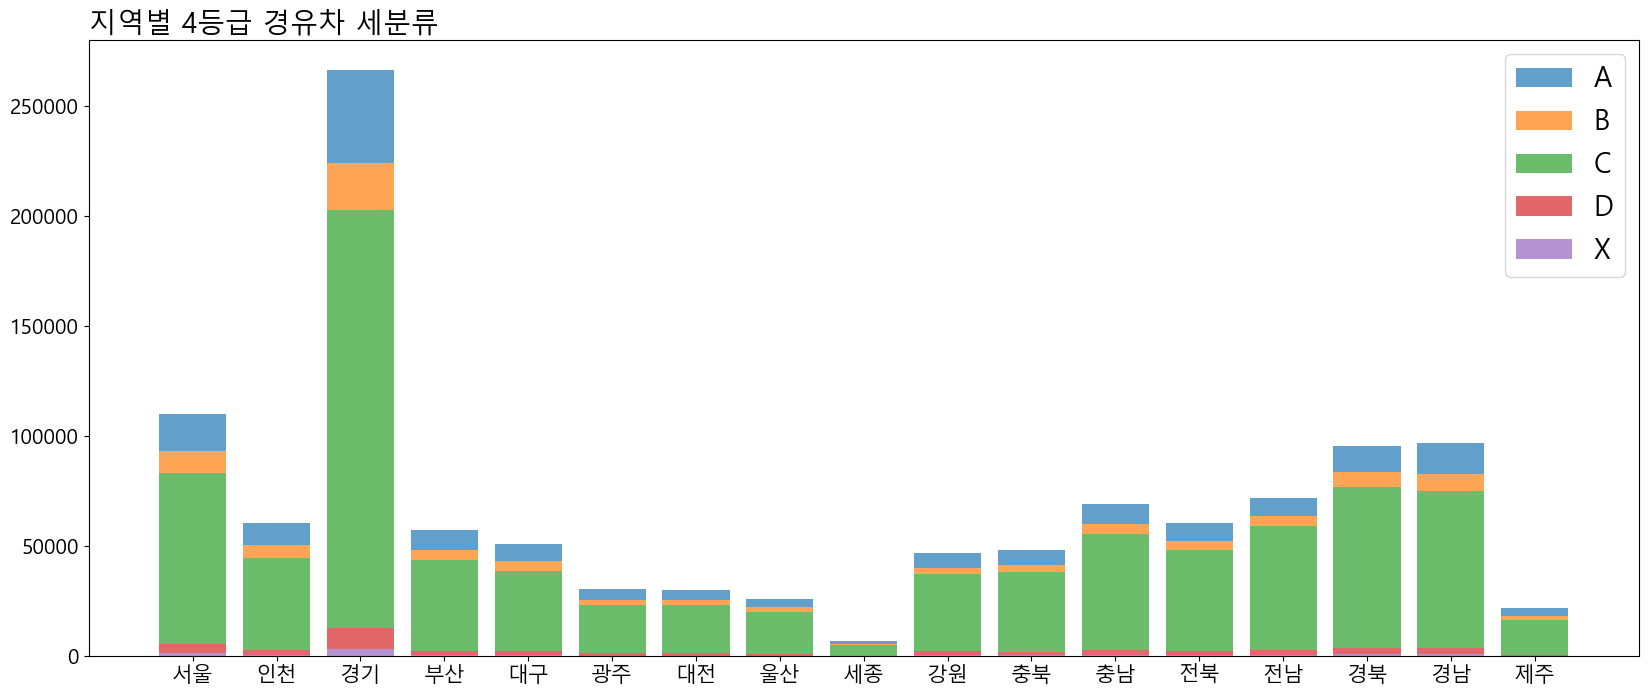

In [102]:
x = vis_df.columns[1:]
# ya = list(vis_df.iloc[0, 1:])
# yb = list(vis_df.iloc[1, 1:])
# yc = list(vis_df.iloc[2, 1:])
# yd = list(vis_df.iloc[3, 1:])
# yx = list(vis_df.iloc[4, 1:])
labels = ['A', 'B', 'C', 'D', 'X']
plt.figure(figsize=(20, 8))
plt.title(f'지역별 4등급 {fuel}차 세분류', loc='left', fontdict={'fontsize':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for i in range(vis_df.shape[0]):
    plt.bar(x, list(vis_df.iloc[i, 1:]), bottom=np.sum(vis_df.iloc[i+1:, 1:]), label=labels[i], alpha=0.7)
plt.legend(fontsize=20);

In [103]:
vis_df.to_excel(os.path.join(analysis_fold, 'BD1-2_통계_4등급_경유차_지역_EG.xlsx'), index=False)

#### 4등급 시도별, EG별 차량수

In [10]:
total.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '인증번호 수정 유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', '배출가스', '등급2',
       'DPF', '비고', 'Grade', '시군구명_수정', 'dong_code', 'E_CO_total',
       'E_HC_total', 'E_NOx_total', 'E_PM10_total', 'E_PM2_5_total'],
      dtype='object')

In [16]:
vis_df2 = total.groupby(['시도명', '시군구명', 'Grade'], dropna=False)['차대번호'].count().unstack().reset_index()
vis_df2

Grade,시도명,시군구명,A,B,C,D,X,NaN
0,강원도,강릉시,1060.00,1443.00,4221.00,213.00,127.00,21.00
1,강원도,고성군,155.00,300.00,898.00,34.00,12.00,NaN
2,강원도,동해시,459.00,793.00,1824.00,111.00,53.00,7.00
3,강원도,삼척시,354.00,419.00,1582.00,75.00,46.00,6.00
4,강원도,속초시,298.00,636.00,1407.00,79.00,53.00,5.00
...,...,...,...,...,...,...,...,...
251,충청북도,청주시 상당구,831.00,1407.00,3440.00,160.00,106.00,23.00
252,충청북도,청주시 서원구,869.00,1415.00,3035.00,173.00,130.00,9.00
253,충청북도,청주시 청원구,936.00,1652.00,3655.00,181.00,134.00,13.00
254,충청북도,청주시 흥덕구,1139.00,1881.00,4383.00,198.00,162.00,21.00


In [17]:
vis_df2.to_excel(os.path.join(analysis_fold, '통계_4등급_시도_시구군_EG별_차량현황.xlsx'), index=False)

## [출력] EG 통계

In [79]:
analysis_fold

'D:/data/big2/BD1/an'

In [80]:
today_date = datetime.today().strftime("%Y.%m.%d_%p.%I.%M.%S")
today_date

'2023.05.22_PM.02.11.40'

In [81]:
with pd.ExcelWriter(os.path.join(analysis_fold, f'통계_result(경유,휘발유,LPG)_EG_{today_date}.xlsx')) as writer:
    num_by_fuel.to_excel(writer, sheet_name='연료별', index=False)
    num_by_grade.to_excel(writer, sheet_name='연료_등급별')
    num_by_grade_by_local.to_excel(writer, sheet_name='지역별')

## [출력] 지역별 샘플

In [54]:
df.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', 'fuel', 'Grade'],
      dtype='object')

In [55]:
df[['법정동코드', '시도명', '시군구명', 'Grade', '차량번호', 'DPF유무_수정', '연식']].head(10)

,법정동코드,시도명,시군구명,Grade,차량번호,DPF유무_수정,연식
0,3017011600,대전광역시,서구,D,21로7811,무,2006
1,2635010700,부산광역시,해운대구,D,23거2347,무,2006
2,4148012200,경기도,파주시,D,04어9316,무,2006
3,2623010900,부산광역시,부산진구,D,14우2622,무,2006
4,5013010300,제주특별자치도,서귀포시,D,07머3269,무,2006
5,4150031021,경기도,이천시,D,58거7827,무,2006
6,4817012100,경상남도,진주시,D,64보3244,무,2006
7,4167025035,경기도,여주시,D,69가2031,무,2006
8,4213010300,강원도,원주시,D,06주6090,무,2006
9,4684035021,전라남도,무안군,D,32어5631,무,2006


In [74]:
# df[['법정동코드', '시도명', '시군구명', 'Grade', '차량번호', 'DPF유무_수정', '연식']].head(10).to_excel(os.path.join(analysis_fold, f'샘플_법정동코드_지역_{today_date}.xlsx'), index=False)

In [56]:
df.groupby(['시도명', '시군구명', 'Grade', 'DPF유무_수정'], dropna=False)['차대번호'].count()

시도명   시군구명  Grade  DPF유무_수정
강원도   강릉시   A      유            928
                   NaN          117
            B      유            459
                   NaN          981
            C      무           4221
                               ... 
충청북도  충주시   B      NaN         1425
            C      무           4999
            D      무            218
            X      확인불가         103
                   NaN           49
Name: 차대번호, Length: 2006, dtype: int64

# 배인번호 HB 포함한 샘플 출력

In [108]:
df1.columns

Index(['차대번호', '차량번호', '제원관리번호', '차종', '용도', '최초등록일', '연식', '제작일자', '검사유효일',
       '배출가스인증번호', '등급', '차명', '차종분류', '차종유형', '자동차형식', '제작사명', '연료', '엔진형식',
       '총중량', '적재중량', '엔진출력', '배기량', '법정동코드', '시도명', '시군구명', '소유자구분', '말소여부',
       '일치유무', '배인번호_수정', '등급_수정', 'DPF유무_수정', 'Grade'],
      dtype='object')

In [114]:
hb = df1.copy()

In [115]:
hb['배출가스인증번호'] = hb['배출가스인증번호'].astype('str')
hb['배인번호_수정'] = hb['배인번호_수정'].astype('str')

In [116]:
temp = hb.loc[hb['배인번호_수정'].str.contains('HB')].reset_index(drop=True)
temp.shape

(2672, 32)

## [출력] 샘플

In [117]:
# about 1.5s
temp.to_excel(os.path.join(raw_fold, '샘플_배인번호_수정에_HB포함.xlsx'), index=False)

# 코드 마지막